## imports


In [1]:
import xlrd 
import pandas as pd
import missingno as msno
import plotly.express as px
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
from sklearn import svm
from sklearn.svm import SVR
import math 
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
def reshaping (Y , Z , A, J):
    myarray=[]
    for i in range (len(Y)):
        temp=[Y[i],Z[i],A[i],J[i]]
        myarray.append(temp)
    return myarray

In [3]:
def reshapdate (X):
    myarray=[]
    for i in range (len(X)):
        temp=[X[i]]
        myarray.append(temp)
    return myarray

In [4]:
def splt (X):
    myarray=[]
    for i in range (len(X)):
        temp = X[i].split("/")
        myarray.append(temp)
    return myarray

## read file 

In [17]:
fpath=("nfeature.csv")
lpath=("train_label.csv")
features = pd.read_csv(fpath)
label=pd.read_csv(lpath)['label']
features.head()

,Unnamed: 0,date,count,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131
0,NaN,0,136088194,136088202,136088394,136088802,136089546,136110468,136216674,136222202,...,1.362250e+08,136675426.0,136675626.0,136676578.0,136676650.0,136676666.0,136676682.0,136676698.0,136676714.0,136676754.0
1,0.0,5/3/2015,0,0,0,0,1,504,0,2,...,9.056261e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,5/4/2015,0,0,0,0,0,2250,0,1,...,2.540209e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,5/5/2015,0,0,0,0,0,1700,0,2,...,1.360972e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,5/6/2015,0,0,0,0,0,2261,0,10,...,2.612264e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
f = pd.DataFrame(features)
print (f.describe())

       Unnamed: 0         count    Unnamed: 3    Unnamed: 4    Unnamed: 5  \
count  983.000000  9.840000e+02  9.840000e+02  9.840000e+02  9.840000e+02   
mean   491.000000  1.383028e+05  1.383016e+05  1.383012e+05  1.383021e+05   
std    283.911958  4.338333e+06  4.338333e+06  4.338340e+06  4.338353e+06   
min      0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    245.500000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    491.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    736.500000  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    982.000000  1.360882e+08  1.360882e+08  1.360884e+08  1.360888e+08   

         Unnamed: 6    Unnamed: 7    Unnamed: 8    Unnamed: 9   Unnamed: 10  \
count  9.840000e+02  9.840000e+02  9.840000e+02  9.840000e+02  9.840000e+02   
mean   1.383025e+05  1.389163e+05  1.384316e+05  1.384417e+05  1.384424e+05   
std    4.338376e+06  4.339025e+06  4.342429e+06  4.342605e+06  4.3426

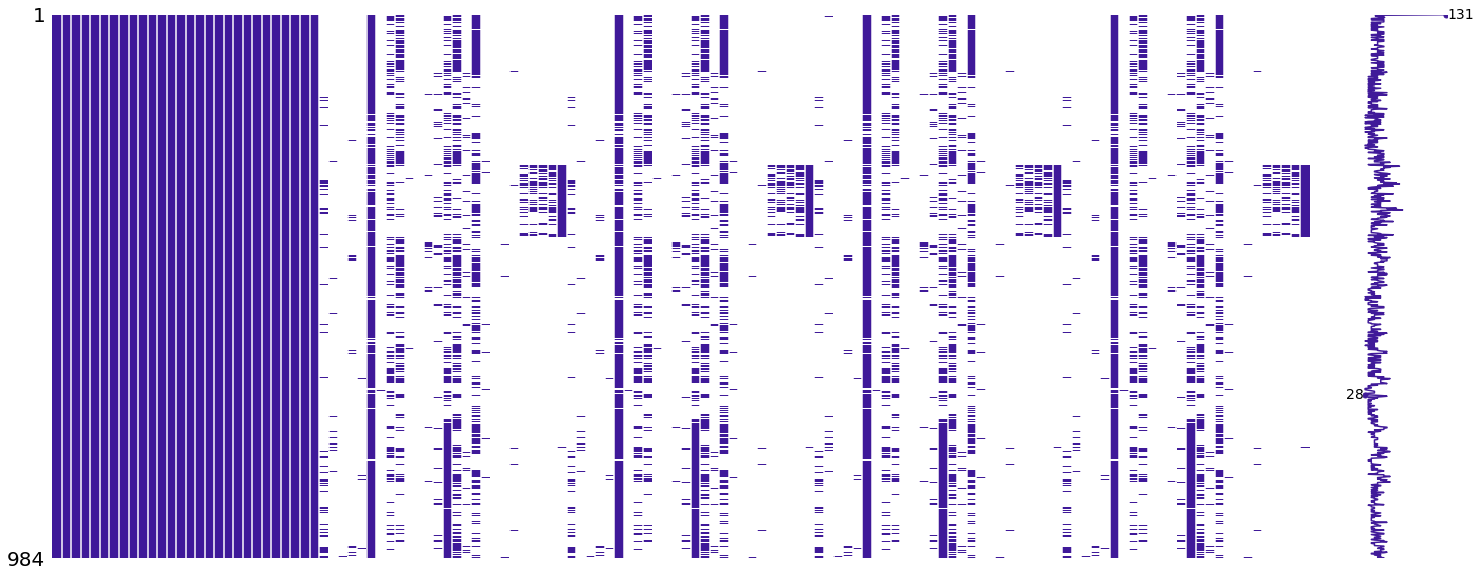

In [19]:
check_MV = msno.nullity_sort(features)
msno.matrix(check_MV, color=(0.25, 0.1, 0.6))

In [20]:
nfeatures=features.fillna(0)

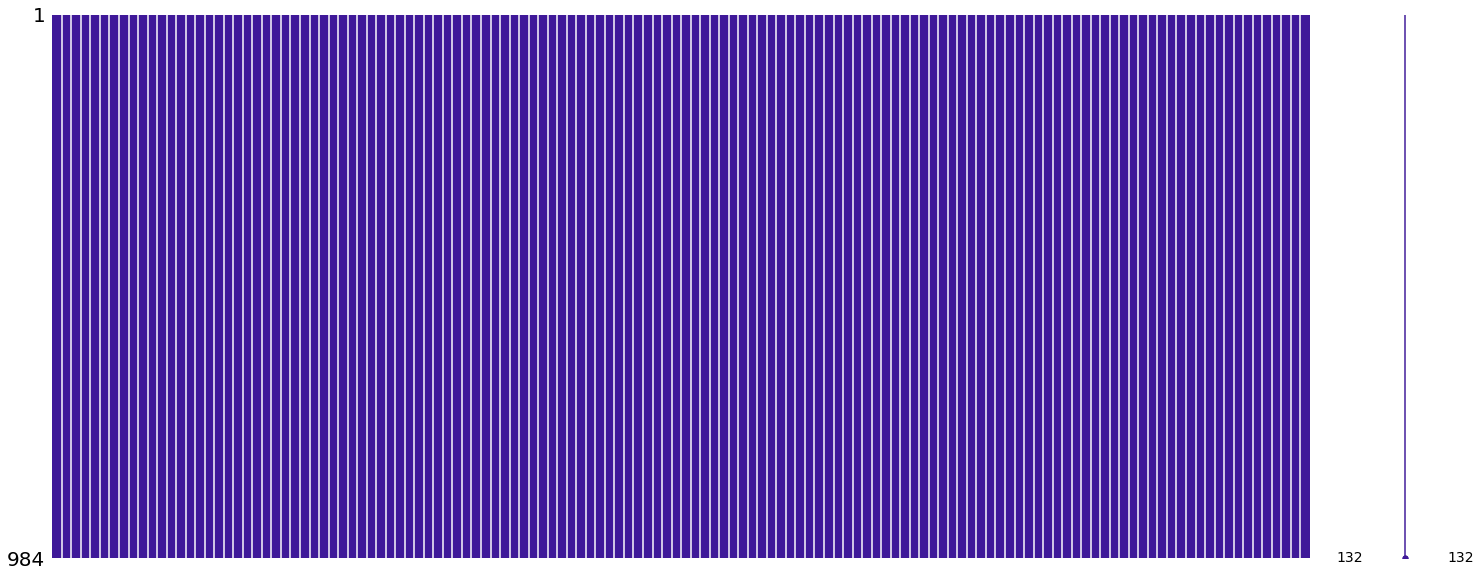

In [21]:
check_MV = msno.nullity_sort(nfeatures)
msno.matrix(check_MV, color=(0.25, 0.1, 0.6))

In [22]:
data = [go.Scatter(x=nfeatures['date'], y=label)]

py.iplot(data, filename = 'time-series-simple')

In [23]:
#convert the date in to time stamp. 
date=nfeatures["date"][:-1]
#date = pd.to_datetime(date, errors='coerce')
#date=date.map(dt.datetime.toordinal)
#date=[date * for date in date]
Xfeatures=reshaping(nfeatures["count"],nfeatures["min"],nfeatures["max"],nfeatures["std"])
np.any(np.isnan(Xfeatures))
date=reshapdate(date)
#date = ' '.join([str(date) for elem in date])

In [24]:
Xfeatures=Xfeatures[1:515]
Xfeatures=nfeatures.filter('date')
#date= np.array(date, dtype=np.float32) 
print(type(date))

ValueError: could not convert string to float: '5/3/2015'

In [15]:
date_train, date_test, label_train, label_test= train_test_split(date[: 515],label[: 515], test_size=0.5, random_state=0)


In [16]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(date_train,label_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').